** By : Divya Ray **

# Red Wine-Quality-Predictions
Predicting the Quality of Red Wine using Machine Learning Algorithms for Regression Analysis, Data Visualizations and Data Analysis.



# Data Set Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information:
    Input variables (based on physicochemical tests):
    1 - fixed acidity 
    2 - volatile acidity 
    3 - citric acid 
    4 - residual sugar 
    5 - chlorides 
    6 - free sulfur dioxide 
    7 - total sulfur dioxide 
    8 - density 
    9 - pH 
    10 - sulphates 
    11 - alcohol 
    Output variable (based on sensory data): 
    12 - quality (score between 0 and 10) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:\\Users\\Vignesh Prakash\\Documents\\Great Learning\\Class\\Unsupervised\\Take Home\\Day 2\\winequality-red-1.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [8]:
profile

Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


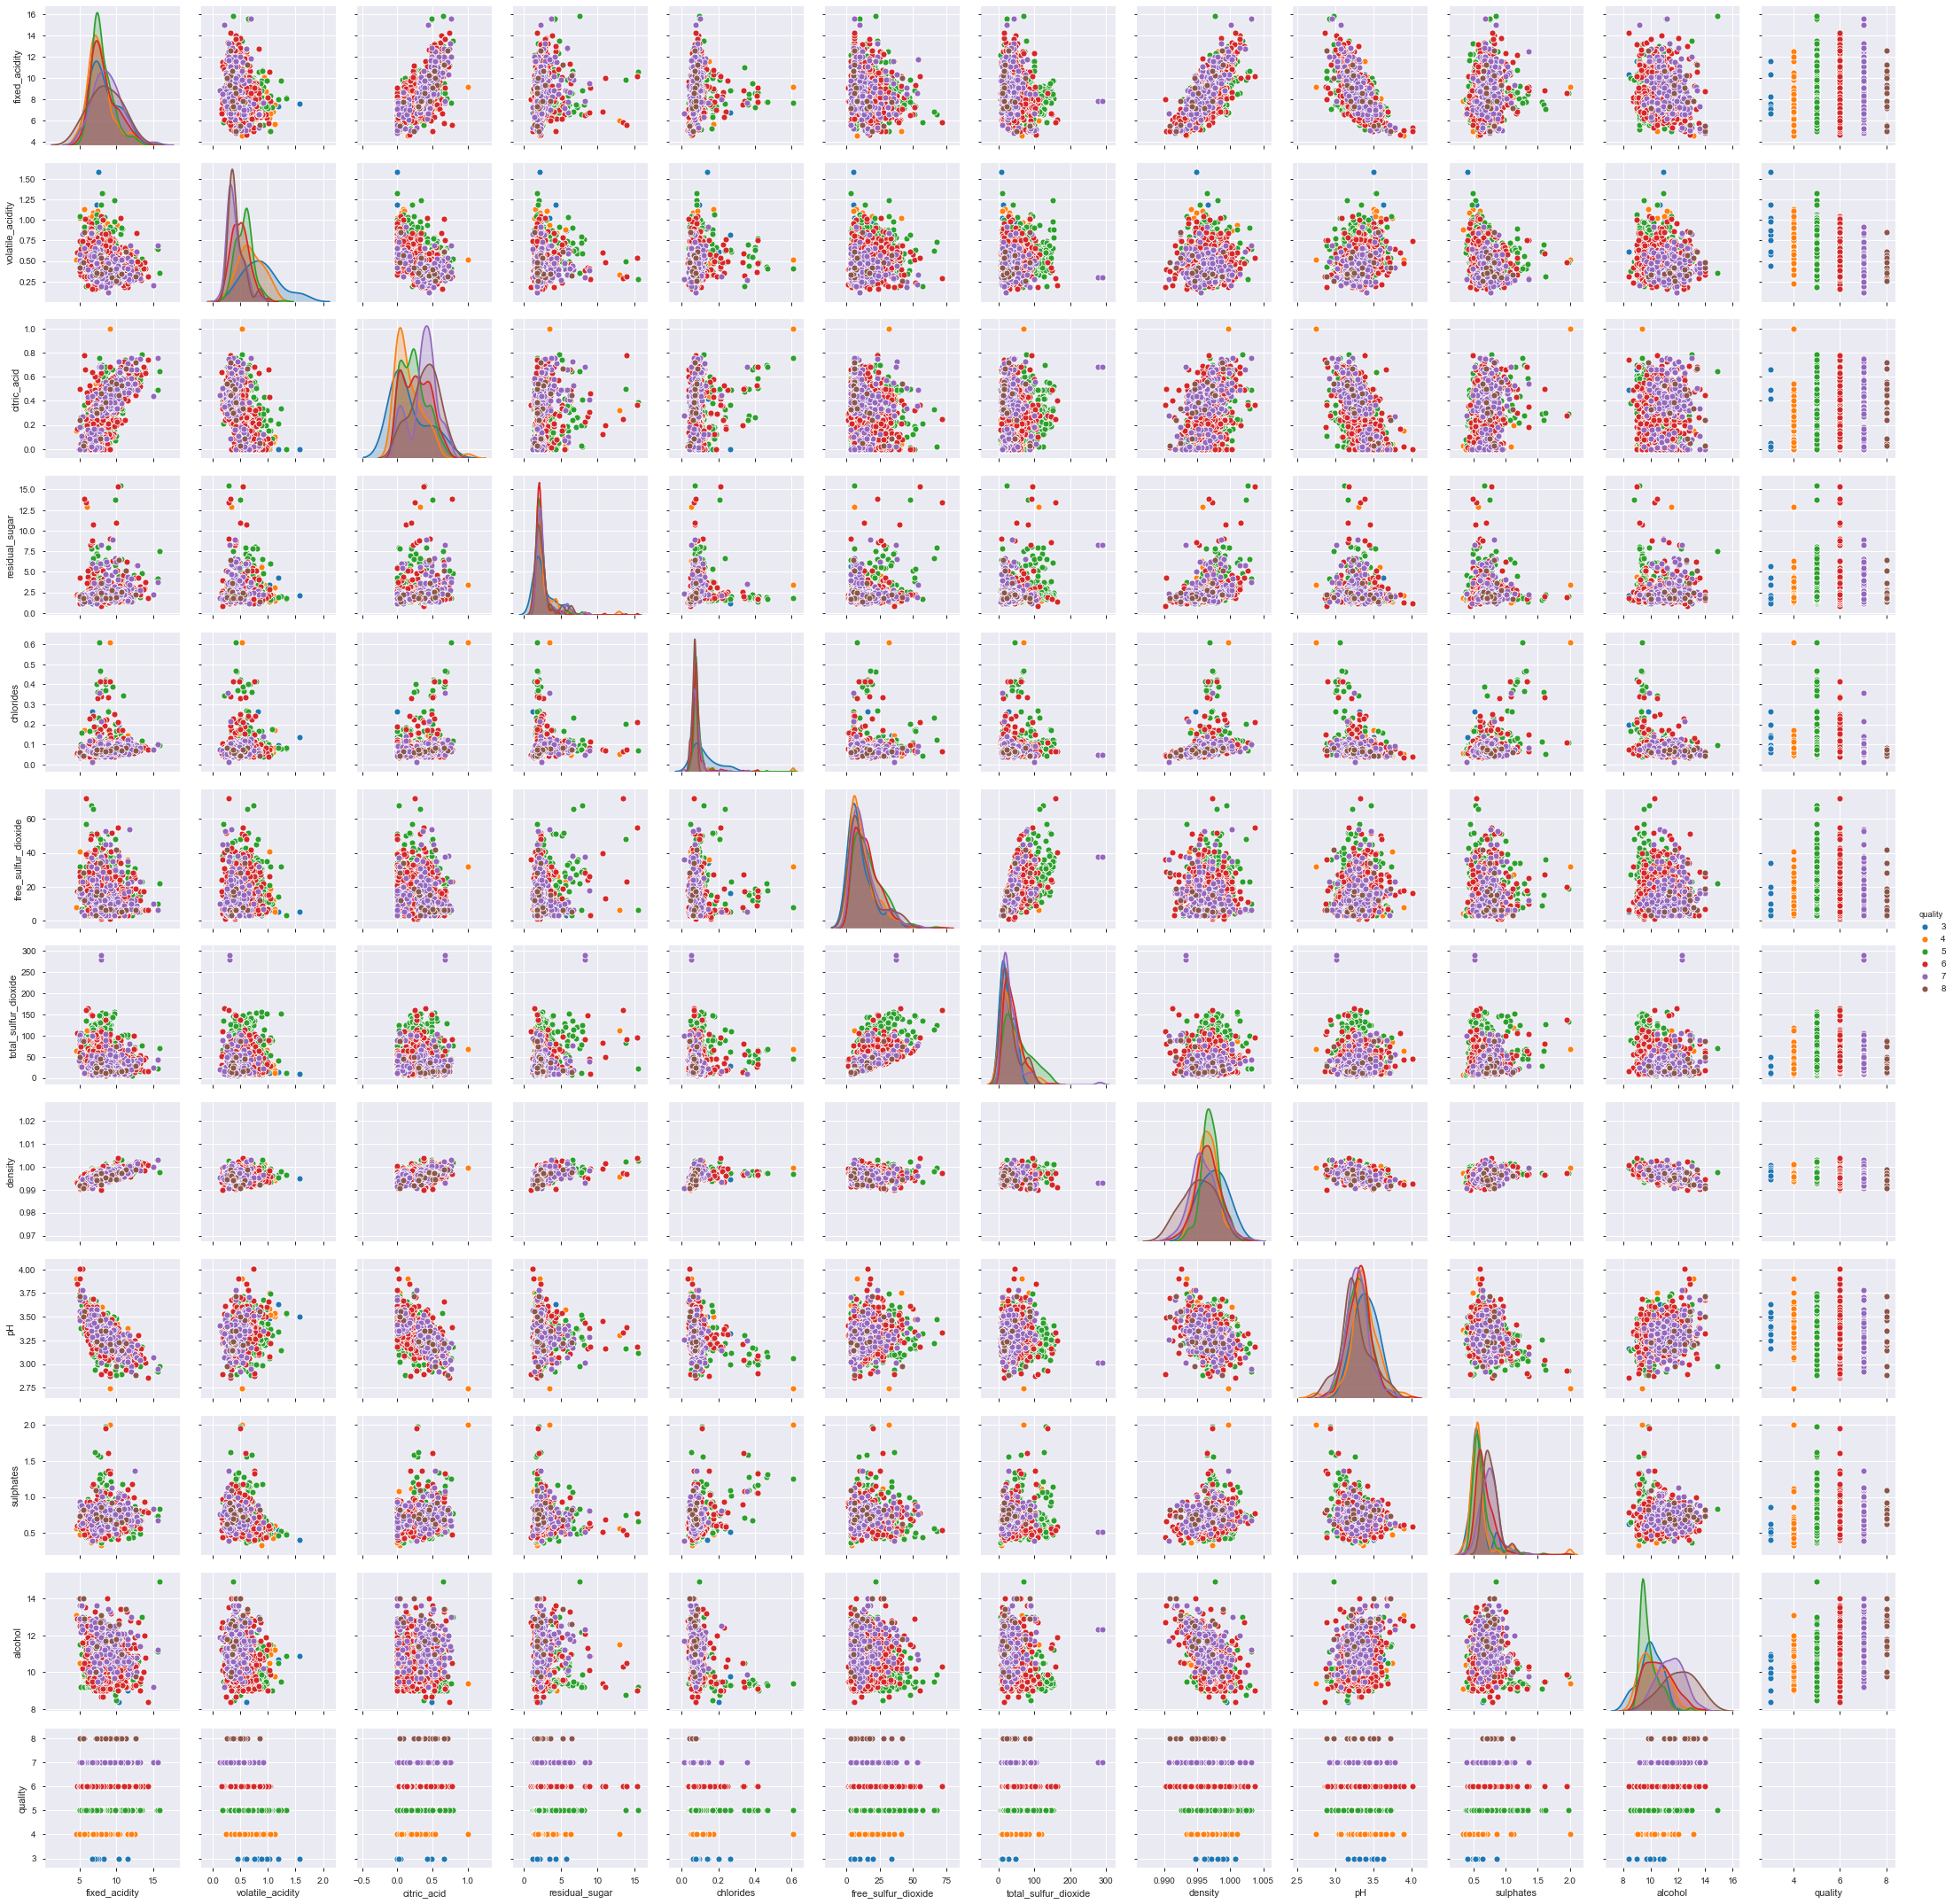

In [12]:
sns.pairplot(df,hue='quality')

In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df2=df.drop('quality',axis=1)

In [10]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Standardization

In [11]:
from scipy.stats import zscore

In [12]:
df_scaled=df2.apply(zscore)
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# K-Means

In [13]:
model=KMeans(n_clusters=2)

In [20]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
cluster_range=range(1,15)
cluster_error=[]
for a in cluster_range:
    cluster=KMeans(a,n_init=10)
    cluster.fit(df_scaled)
    cluster_error.append(cluster.inertia_)
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_error':cluster_error})
cluster_df

,num_cluster,cluster_error
0,1,17589.000000
1,2,14330.119811
2,3,12629.974592
3,4,11294.210161
4,5,10155.374026
5,6,9361.220262
6,7,8644.835533
7,8,8304.937729
8,9,7987.552683
9,10,7734.894571


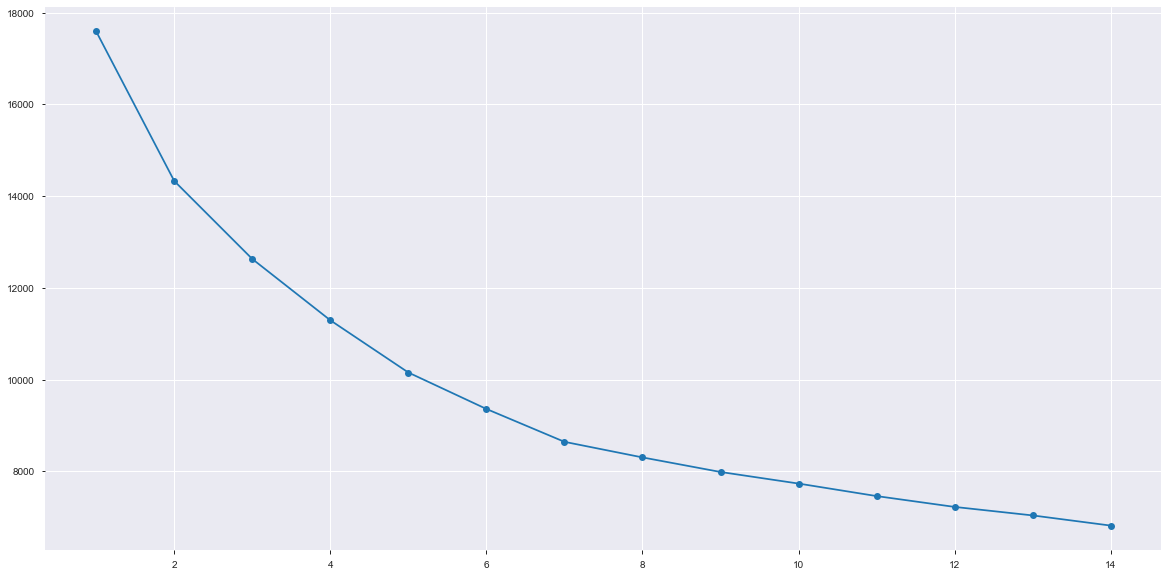

In [22]:
plt.figure(figsize=(20,10))
plt.plot(cluster_df['num_cluster'],cluster_df['cluster_error'],marker='o')

In [23]:
kmeans=KMeans(n_clusters=7,n_init=15,random_state=3)

In [24]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [25]:
centroids=kmeans.cluster_centers_
pd.DataFrame(centroids,columns=df2.columns)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.103036,0.054116,0.053545,-0.011648,-0.032946,0.994389,1.232270,0.223749,-0.107787,-0.188135,-0.572635
1,-0.418155,0.644139,-0.790846,-0.205468,-0.038042,-0.478504,-0.413608,0.015788,0.325545,-0.397456,-0.501340
2,0.066543,-1.024438,0.708373,-0.171971,-0.284351,-0.272645,-0.514337,-0.650875,-0.125956,0.412730,0.996007
3,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563
4,-1.132704,0.412590,-0.938478,-0.237307,-0.430739,0.308158,-0.131094,-1.382406,1.241362,-0.134535,1.227706
5,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913
6,1.656815,-0.603712,1.237905,0.139357,0.032350,-0.528135,-0.468401,1.095496,-1.003893,0.289225,0.014575


In [26]:
df_scaled['class']=kmeans.labels_.astype('object')

In [27]:
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1


In [28]:
df_k=df_scaled

In [80]:

df_k['class']=df_k['class'].astype('object')

In [33]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

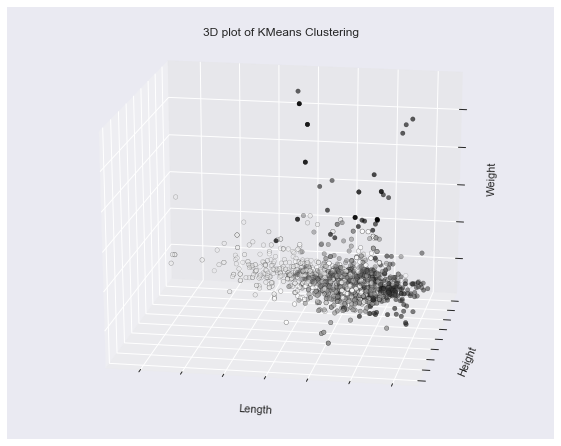

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

# HIERARCHICAL CLUSTERING ALGORITHM

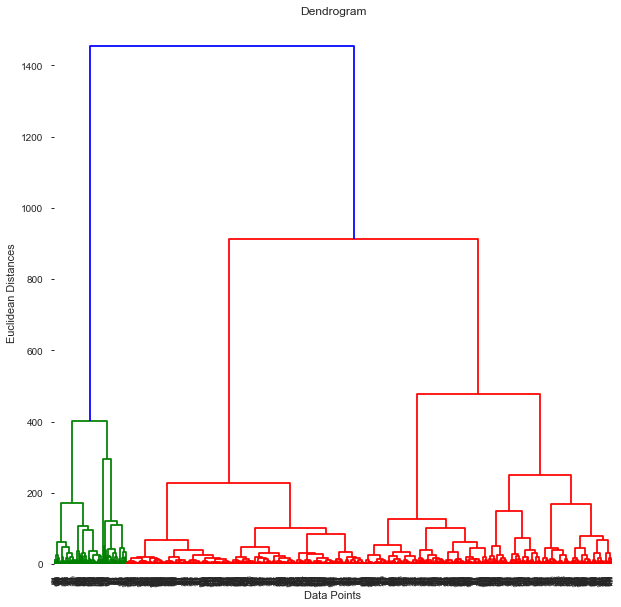

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df2, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**From the dendrogram we can read there are 2 classes in our data set.**

In [41]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df_scaled)

df_h = df_scaled.copy(deep=True)
df_h['class'] = cluster2

In [42]:
df_h

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,1
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,2
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,2
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,2
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,2


In [77]:
df_h['class']=df_h['class'].astype('object',inplace=True)

0       1
1       1
2       1
3       0
4       1
       ..
1594    2
1595    2
1596    2
1597    2
1598    2
Name: class, Length: 1599, dtype: int64

In [43]:
print('Original Data Classes:')
print(df['quality'].value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k['class'].value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h['class'].value_counts())

Original Data Classes:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
------------------------------
K-Means Predicted Data Classes:
1    501
0    335
6    264
2    251
4    185
5     34
3     29
Name: class, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
1    837
2    436
0    326
Name: class, dtype: int64


# Classification Model

In [49]:
x= df_k.drop('class',axis=1)
y= pd.DataFrame(df_k['class'].astype('float64'))

In [50]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [51]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

In [52]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
class    1599 non-null float64
dtypes: float64(1)
memory usage: 12.6 KB


# DecisionTree

In [53]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.8016085790884718
Validation Accuracy  ::  0.74375


In [55]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        99
         1.0       0.75      0.86      0.80       132
         2.0       0.64      0.72      0.67        85
         3.0       0.00      0.00      0.00         7
         4.0       0.87      0.72      0.79        57
         5.0       0.00      0.00      0.00         9
         6.0       0.89      0.77      0.82        91

    accuracy                           0.74       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.73      0.74      0.73       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [56]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9428060768543343
Validation Accuracy  ::  0.8895833333333333


In [58]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        99
         1.0       0.85      0.92      0.88       132
         2.0       0.93      0.78      0.85        85
         3.0       1.00      0.86      0.92         7
         4.0       0.94      0.88      0.91        57
         5.0       1.00      0.56      0.71         9
         6.0       0.92      0.92      0.92        91

    accuracy                           0.89       480
   macro avg       0.93      0.84      0.87       480
weighted avg       0.89      0.89      0.89       480



## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [60]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [61]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[2. 0. 0. ... 1. 6. 1.]
Train Accuracy  ::  0.9535299374441466


In [62]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1. 6. 2. 1. 4. 1. 4. 2. 1. 0. 2. 2. 6. 1. 1. 0. 2. 1. 1. 4. 1. 0. 1. 1.
 0. 6. 1. 0. 6. 1. 6. 0. 4. 1. 0. 0. 2. 1. 6. 0. 0. 2. 2. 4. 1. 4. 0. 4.
 2. 2. 2. 1. 6. 2. 1. 2. 6. 4. 4. 2. 1. 2. 2. 1. 0. 0. 1. 4. 4. 1. 2. 6.
 6. 6. 0. 6. 0. 6. 1. 2. 4. 2. 0. 1. 1. 2. 0. 1. 2. 1. 4. 1. 1. 0. 4. 1.
 6. 1. 2. 6. 1. 1. 1. 0. 1. 6. 4. 1. 1. 0. 4. 0. 4. 4. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 4. 2. 6. 1. 6. 2. 6. 6. 1. 2. 0. 6. 4. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 6. 0. 0. 6. 1. 2. 1. 0. 1. 0. 6. 1. 0. 6. 2. 6. 1. 1. 0. 0.
 4. 3. 0. 6. 0. 6. 6. 1. 6. 6. 2. 1. 4. 1. 6. 6. 0. 4. 6. 0. 1. 2. 0. 2.
 1. 0. 1. 0. 1. 2. 2. 2. 0. 6. 5. 2. 6. 2. 2. 0. 0. 6. 6. 4. 1. 0. 0. 1.
 1. 6. 1. 4. 0. 6. 1. 4. 0. 2. 0. 2. 1. 1. 0. 1. 2. 6. 2. 0. 6. 2. 1. 1.
 0. 1. 1. 0. 0. 1. 6. 1. 1. 6. 1. 0. 2. 2. 2. 4. 1. 2. 1. 5. 6. 0. 2. 6.
 1. 0. 1. 1. 1. 0. 2. 0. 2. 6. 0. 6. 0. 0. 6. 2. 2. 6. 4. 6. 2. 4. 6. 5.
 6. 2. 0. 2. 1. 2. 0. 6. 0. 0. 1. 6. 0. 4. 2. 6. 4. 6. 1. 0. 1. 0. 1. 2.
 6. 2. 1. 1. 4. 1. 0. 6. 6. 0. 0. 3. 6. 0. 0. 4. 1.

## Agglomerative clustering

In [63]:
x= df_h.drop('class',axis=1)
y= pd.DataFrame(df_h['class'].astype('float64'))

In [64]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [65]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.8552278820375335
Validation Accuracy  ::  0.80625


In [68]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.76       107
         1.0       0.74      0.97      0.84       230
         2.0       0.93      0.65      0.77       143

    accuracy                           0.81       480
   macro avg       0.86      0.76      0.79       480
weighted avg       0.83      0.81      0.80       480



## Random Forest

In [69]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [70]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9436997319034852
Validation Accuracy  ::  0.8875


In [71]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90       107
         1.0       0.85      0.97      0.91       230
         2.0       0.94      0.76      0.84       143

    accuracy                           0.89       480
   macro avg       0.90      0.87      0.88       480
weighted avg       0.89      0.89      0.89       480



## KNN

In [73]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [74]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[2. 1. 1. ... 1. 0. 1.]
Train Accuracy  ::  0.966934763181412


In [75]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1. 0. 2. 1. 2. 1. 2. 0. 1. 1. 2. 2. 0. 1. 1. 1. 2. 1. 1. 2. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 2. 1. 1. 1. 2. 1. 0. 1. 1. 0. 2. 2. 1. 2. 1. 2.
 2. 2. 2. 1. 0. 2. 1. 2. 0. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 0.
 0. 0. 1. 0. 1. 0. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 0. 1. 2. 0. 1. 1. 1. 1. 1. 0. 2. 1. 1. 0. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 2. 0. 1. 0. 2. 0. 0. 1. 2. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 2. 0. 1. 0. 1. 0. 0. 1. 0. 0. 2. 1. 2. 1. 0. 0. 1. 2. 0. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 2. 2. 2. 1. 0. 0. 2. 0. 0. 2. 1. 1. 0. 0. 2. 0. 1. 1. 1.
 1. 0. 1. 2. 1. 0. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 0. 2. 1. 0. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 2. 2. 2. 2. 1. 2. 1. 0. 0. 1. 2. 0.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 0. 1. 0. 2. 1. 0. 2. 2. 0. 2. 0. 0. 2. 0. 0.
 0. 2. 1. 2. 1. 2. 1. 0. 1. 1. 1. 0. 1. 2. 2. 0. 2. 0. 1. 1. 1. 1. 1. 2.
 0. 2. 1. 1. 2. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 2. 1.

##### Hence Agglomerative KNN Model is a good model